In [2]:
import pandas as pd

# 读取CSV文件
df = pd.read_csv('df_order.csv')

# 统计SKU字段值为'dm'的个数
count_dm = df[df['SKU'] == 'dm'].shape[0]

print(f"SKU value 'dm' count: {count_dm}")

SKU value 'dm' count: 106


In [2]:
import pandas as pd

# Load the CSV file
file_path = 'df_matrix.csv'
df = pd.read_csv(file_path)

# Display the first few rows to understand the structure
df.head()
reachability_matrix = pd.crosstab(df['From'], df['To'])

# 将值更新为二进制形式，表示是否可达
reachability_matrix[reachability_matrix > 0] = 1

reachability_matrix

To,an-shan-shi,bao-ding-shi,bao-tou-shi,bei-jing-DC,bei-jing-shi,bo-zhou-shi,cang-zhou-shi,chang-chun-shi,chang-sha-DC,chang-sha-shi,...,zhan-jiang-shi,zhang-jia-kou-shi,zhang-zhou-shi,zhen-jiang-shi,zheng-zhou-DC,zheng-zhou-shi,zhong-shan-shi,zhou-kou-shi,zhu-hai-shi,zi-bo-shi
From,,,,,,,,,,,,,,,,,,,,,
bei-jing-DC,1,1,1,0,1,1,1,1,0,1,...,1,1,1,1,0,1,1,1,1,1
chang-sha-DC,1,1,1,0,1,1,1,1,0,1,...,1,1,1,1,0,1,1,1,1,1
cheng-du-DC,1,1,1,0,1,1,1,1,0,1,...,1,1,1,1,0,1,1,1,1,1
chong-qing-DC,1,1,1,0,1,1,1,1,0,1,...,1,1,1,1,0,1,1,1,1,1
da-lian-DC,1,1,1,0,1,1,1,1,0,1,...,1,1,1,1,0,1,1,1,1,1
dong-guan-DC,1,1,1,0,1,1,1,1,0,1,...,1,1,1,1,0,1,1,1,1,1
gang-kou-CDC,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
guang-zhou-DC,1,1,1,0,1,1,1,1,0,1,...,1,1,1,1,0,1,1,1,1,1
ha-er-bin-DC,1,1,1,0,1,1,1,1,0,1,...,1,1,1,1,0,1,1,1,1,1


C:\Users\11821\AppData\Local\Temp\ipykernel_13092\3959202560.py:34: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  df_merged.plot(ax=ax, column='qty', legend=True, markersize=df_merged['qty'] * 10, marker='o', color='blue', alpha=0.7)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
c:\Users\11821\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32428 (\N{CJK UNIFIED IDEOGRAPH-7EAC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\11821\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\11821\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Gl

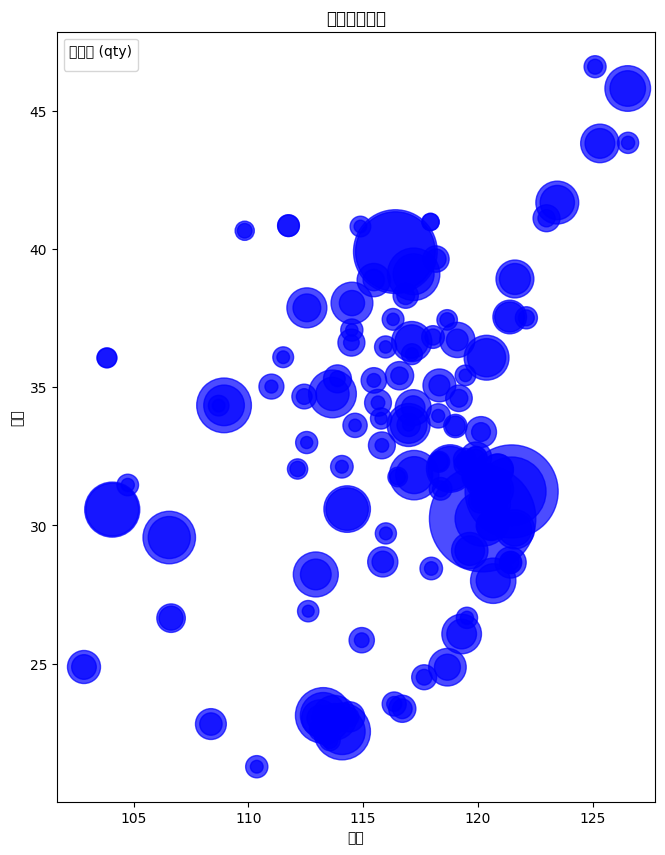

In [8]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# 读取 CSV 文件
df_loc = pd.read_csv('df_loc.csv', header=None, names=['Location', 'Longitude', 'Latitude', 'city_area', 'builtup_area', 'resident_pop', 'gdp'])
df_order = pd.read_csv('df_order.csv', header=0)

# 清洗订单数据集中的 'Name' 字段，移除 'shi' 后缀，并添加分隔符 '-'
df_order['Name'] = df_order['Name'].str.replace('-shi$', '', regex=True)
df_merged = pd.merge(df_loc, df_order, left_on='Location', right_on='Name')

# 过滤出需求量（qty）列，并将其转换为 float 类型
df_merged['qty'] = df_merged['qty'].astype(float)

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# 假设 df_loc 和 df_order 是已经合并好的 DataFrame

# 为订单数据集添加一个空的 'geometry' 列，用于存储点对象
df_merged['geometry'] = None

# 将经纬度转换为 Point 对象，并赋值给 'geometry' 列
df_merged['geometry'] = df_merged.apply(lambda x: Point(x['Longitude'], x['Latitude']), axis=1)

# 设置CRS为WGS84
df_merged = gpd.GeoDataFrame(df_merged, crs="EPSG:4326")

# 绘制地图
fig, ax = plt.subplots(figsize=(15, 10))
df_merged.plot(ax=ax, column='qty', legend=True, markersize=df_merged['qty'] * 10, marker='o', color='blue', alpha=0.7)

# 设置地图的标题和图例
plt.title('订单量聚类图')
plt.xlabel('经度')
plt.ylabel('纬度')
plt.legend(title='订单量 (qty)')

# 显示地图
plt.show()